# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [106]:
haberman_data = pd.read_csv(r'C:\Users\hp user\Desktop\Exercises and solutions\Exercises\datasets_474_966_haberman.csv')

***Check out head of data***

In [107]:
haberman_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [108]:
haberman_data.set_axis(['age', 'op_yr', 'ax', 'status'], axis = 1, inplace = True)

In [109]:
haberman_data.head()

,age,op_yr,ax,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***shape of the dataset***

In [110]:
haberman_data.shape

(305, 4)

***Check out the status column and see how it is classified***

In [111]:
haberman_data['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

***Replace the status values***

1 == Survived

2 == Not_survived

In [192]:
haberman_data['status'].replace({1:'Survived', 2:'Not_survived'}, inplace = True)

***Print out the percentage of data classified***

In [195]:
haberman_data['status'].value_counts(normalize = True) * 100

Survived        73.442623
Not_survived    26.557377
Name: status, dtype: float64

The percentage of patient that survived the surgery 73.53%
The percentage of patient that survived the surgery 26.47%


***Observation:***
input your observation below

* The percentage of the patient who survive the surgery is higher than the ones who do not survive the operation.

* Having breast cancer is afterall not a death sentence from the data above as the surgery has a high chance of being successful.

***Check the description of the data***

In [97]:
haberman_data.describe()

,age,op_yr,ax
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

* The maximum age of the patient is 83 and the lowest age of patient is 30 .
* The highest operation year is 69 while the lowest operation year is 58.
* They are 305 records of patients both the age, operation year and axil.

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

Text(0.5, 0, 'Age of Patient')

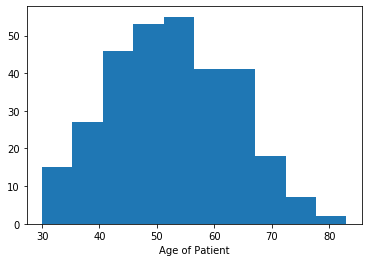

In [159]:
plt.hist(haberman_data['age'])
plt.xlabel('Age of Patient')

Text(0.5, 0, 'Age of Patient')

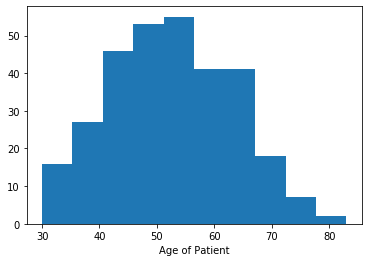

***Hint: Use seaborn FacetGrid***

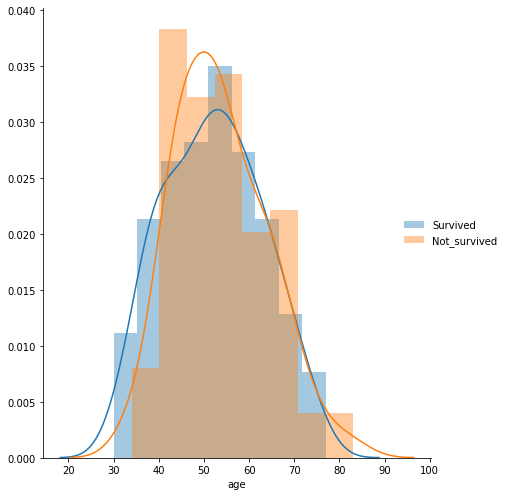

In [128]:
g = sns.FacetGrid(data = haberman_data, hue = 'status', height = 7, aspect = .9)
g.map(sns.distplot, 'age')
plt.legend(bbox_to_anchor=(1.18, .5), loc = 7, borderaxespad=0, frameon = False)

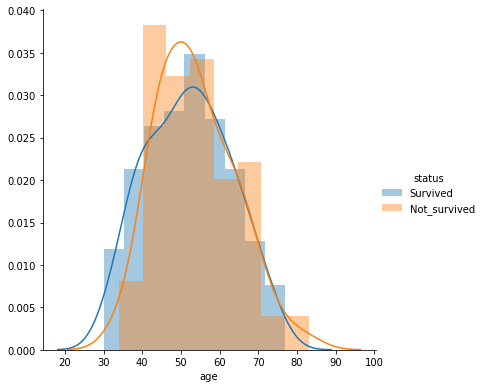

***Observation:*** input your observation below

* The age of the patients is between 30 and 85 years of age.
* The younger the patient the higher the chances of surviving the surgery and the older the patient the lower the chances of surviving the surgery.

***Reproduce this figures***

Text(0.5, 0, 'Year of Operation')

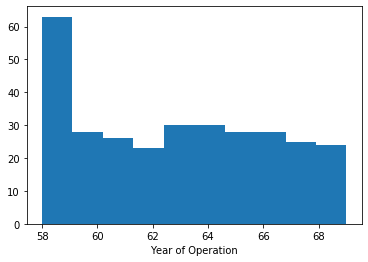

In [162]:
plt.hist(haberman_data['op_yr'])
plt.xlabel('Year of Operation')

Text(0.5, 0, 'Year  of Operation')

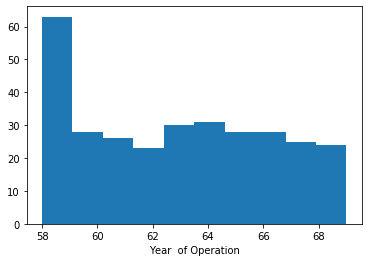

***Hint: Use seaborn FacetGrid***

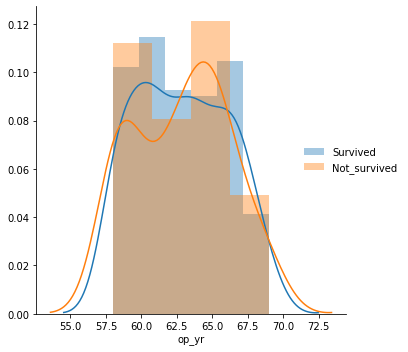

In [214]:
g = sns.FacetGrid(haberman_data, hue = 'status', height = 5, aspect = 1)
g.map(sns.distplot, 'op_yr')
plt.legend(bbox_to_anchor=(1.18, .5), loc = 7, borderaxespad=0, frameon = False)

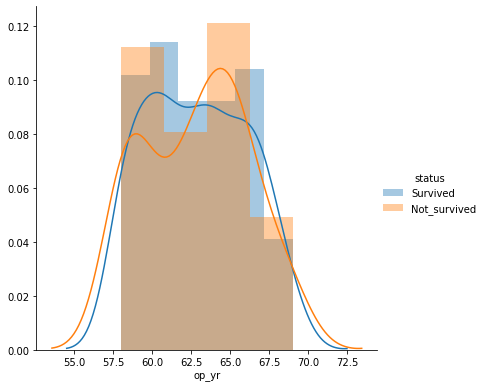

***Observation:*** input your observation below

* The operations were carried out between 1958 and 1968
* The year 1958 to 1966 have the highest number of operated patients.
* A lot of patient survive the operation between 1966 and 1967.

***Reproduce the following figures***

Text(0.5, 0, 'Axil Nodes')

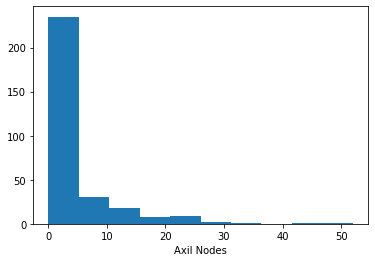

In [163]:
plt.hist(haberman_data['ax'])
plt.xlabel('Axil Nodes')

Text(0.5, 0, 'Axil Nodes')

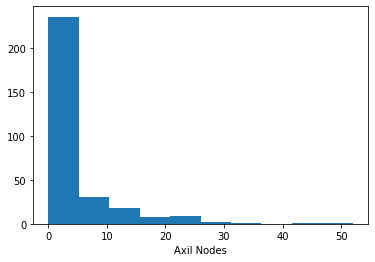

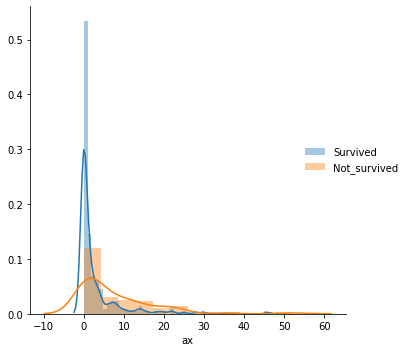

In [218]:
g = sns.FacetGrid(haberman_data, hue = 'status', height = 5, aspect = 1)
g.map(sns.distplot, 'ax')
plt.legend(bbox_to_anchor=(1.18, .5), loc = 7, borderaxespad=0, frameon = False)

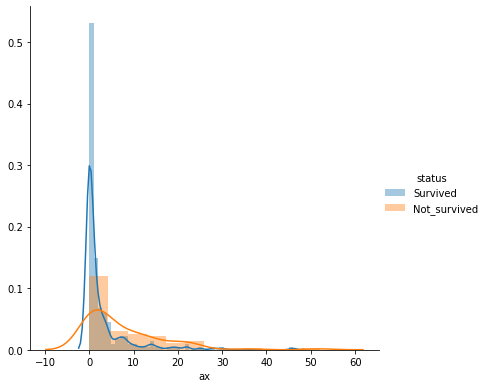

***Observation:*** input your observation below

* The higher the number of axil nodes detected the lower the chances of  surviving the operation and The lower the number of axil nodes detected the higher the chances of surviving the operation.
* The maximum axil nodes detected is between 0 and 10 and the lowest axil node detected is between 15 and 25

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [164]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survived"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [18]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [19]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [20]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [21]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

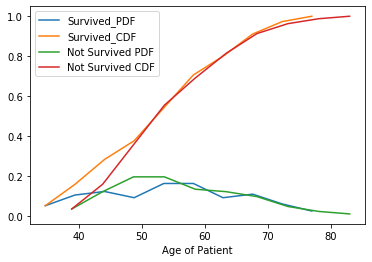

In [22]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [166]:
density_op_yr_survived,bin_edges_op_yr_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_survived=(density_op_yr_survived)/(sum(density_op_yr_survived))

In [174]:
density_op_yr_Not_Survived,bin_Edges_op_yr_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_Not_Survived=(density_op_yr_Not_Survived)/(sum(density_op_yr_Not_Survived))

In [175]:
print("Bin Edges Survived : {}\n".format(bin_edges_op_yr_survived))
print("PDF Survived : {}\n".format(pdf_op_yr_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_op_yr_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_op_yr_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [169]:
cdf_Op_Yr_Not_Survived=np.cumsum(pdf_op_yr_Not_Survived)
cdf_Op_Yr_survived=np.cumsum(pdf_op_yr_survived)

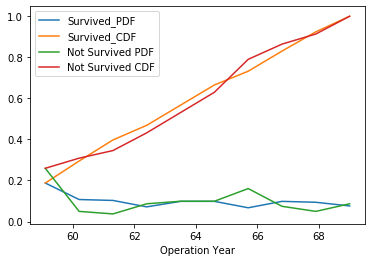

In [171]:
plt.plot(bin_edges_op_yr_survived[1:],pdf_op_yr_survived)
plt.plot(bin_edges_op_yr_survived[1:],cdf_Op_Yr_survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],pdf_op_yr_Not_Survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],cdf_Op_Yr_Not_Survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

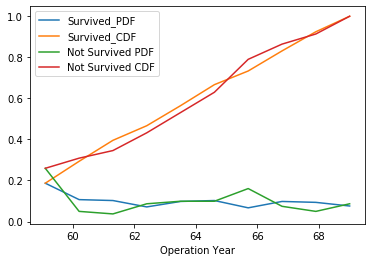

***Observation :*** Input your answer below

* The Survival chances are high for the patients who had their operation at the time before 1960.

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [173]:
density_ax_survived,bin_edges_ax_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_survived=(density_ax_survived)/(sum(density_ax_survived))

In [176]:
density_ax_Not_Survived,bin_Edges_ax_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_Not_Survived=(density_ax_Not_Survived)/(sum(density_ax_Not_Survived))

In [177]:
print("Bin Edges Survived : {}\n".format(bin_edges_ax_survived))
print("PDF Survived : {}\n".format(pdf_ax_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_ax_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_ax_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [178]:
cdf_Ax_Not_Survived=np.cumsum(pdf_ax_Not_Survived)
cdf_Ax_survived=np.cumsum(pdf_ax_survived)

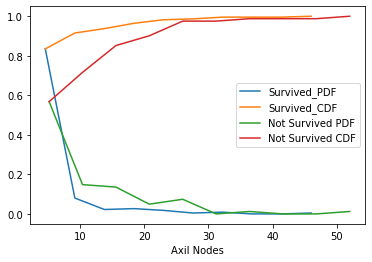

In [179]:
plt.plot(bin_edges_ax_survived[1:],pdf_ax_survived)
plt.plot(bin_edges_ax_survived[1:],cdf_Ax_survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],pdf_ax_Not_Survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],cdf_Ax_Not_Survived)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

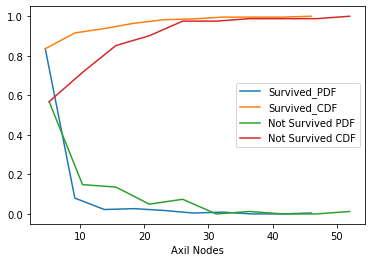

***Observation :*** Input your answer below

* Survival chances decreases with increasing number of axil nodes detected.
* 

## Box Plot

***Reproduce the following Images***

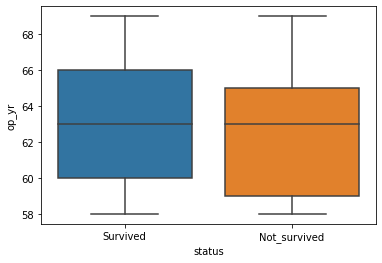

In [183]:
sns.boxplot(x = 'status', y = 'op_yr', data = haberman_data)

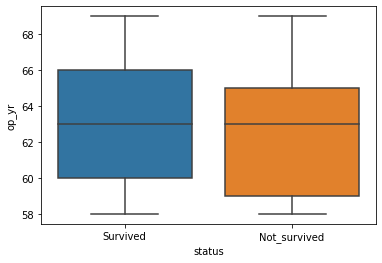

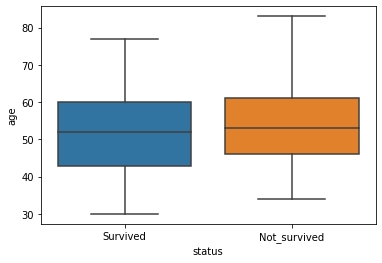

In [184]:
sns.boxplot(x = 'status', y = 'age', data = haberman_data)

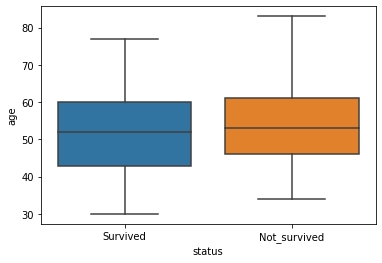

***Observation :*** Input Your answer below

* maximum age of the survived patient is 75. 
* miimum age of the survived patient is 30.
* maximum age of the not_survived patient is 85 and minimum age of the not_survived patient is 35.

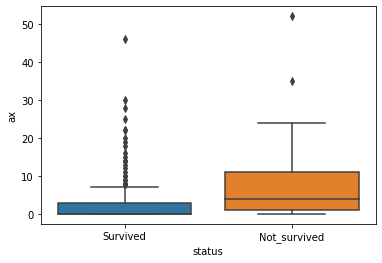

In [185]:
sns.boxplot(x = 'status', y = 'ax', data = haberman_data)

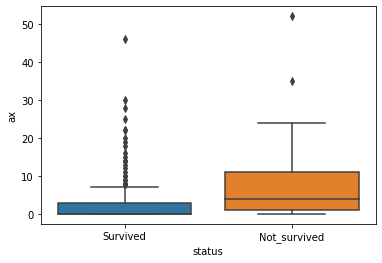

***Observation :*** Input Your answer below

* Patient with axil node between 0 and 10 tend to survive the surgery.
* Patient with axil node above 10 tend to not_survive the surgery.

## Violin Plots

***Reproduce the following images***

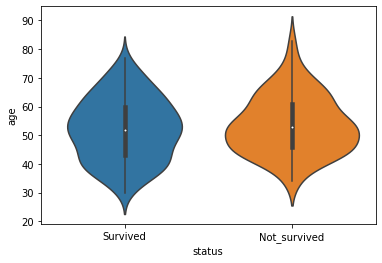

In [186]:
sns.violinplot(x = 'status', y = 'age', data = haberman_data)

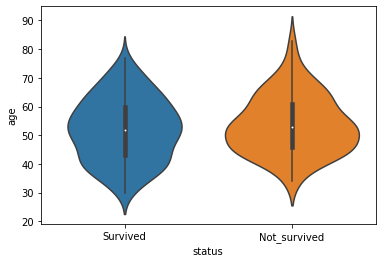

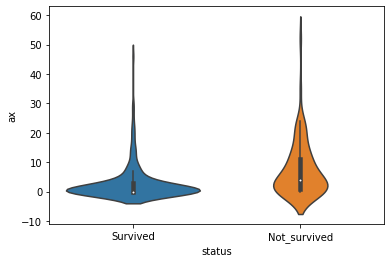

In [187]:
sns.violinplot(x = 'status', y = 'ax', data = haberman_data)

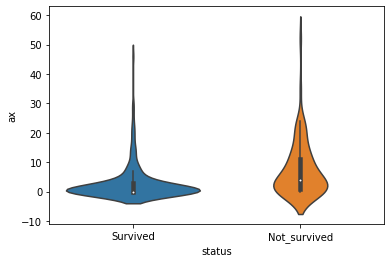

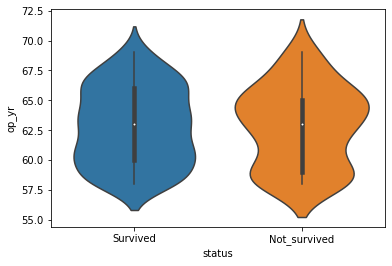

In [188]:
sns.violinplot(x = 'status', y = 'op_yr', data = haberman_data)

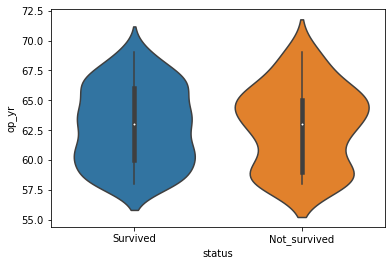

***Observation :*** Input your answer below

* Difficult to infer from this plots
* 

# Bivariate Analysis

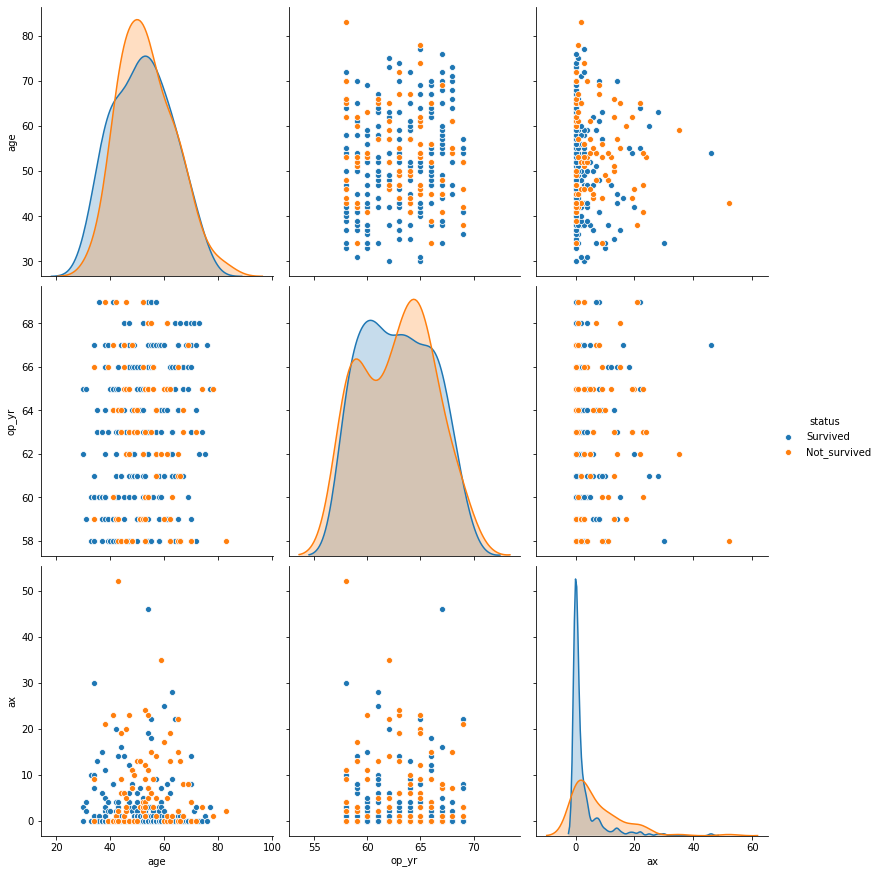

In [237]:
sns.pairplot(haberman_data, hue = 'status', height = 4, aspect = .9 )

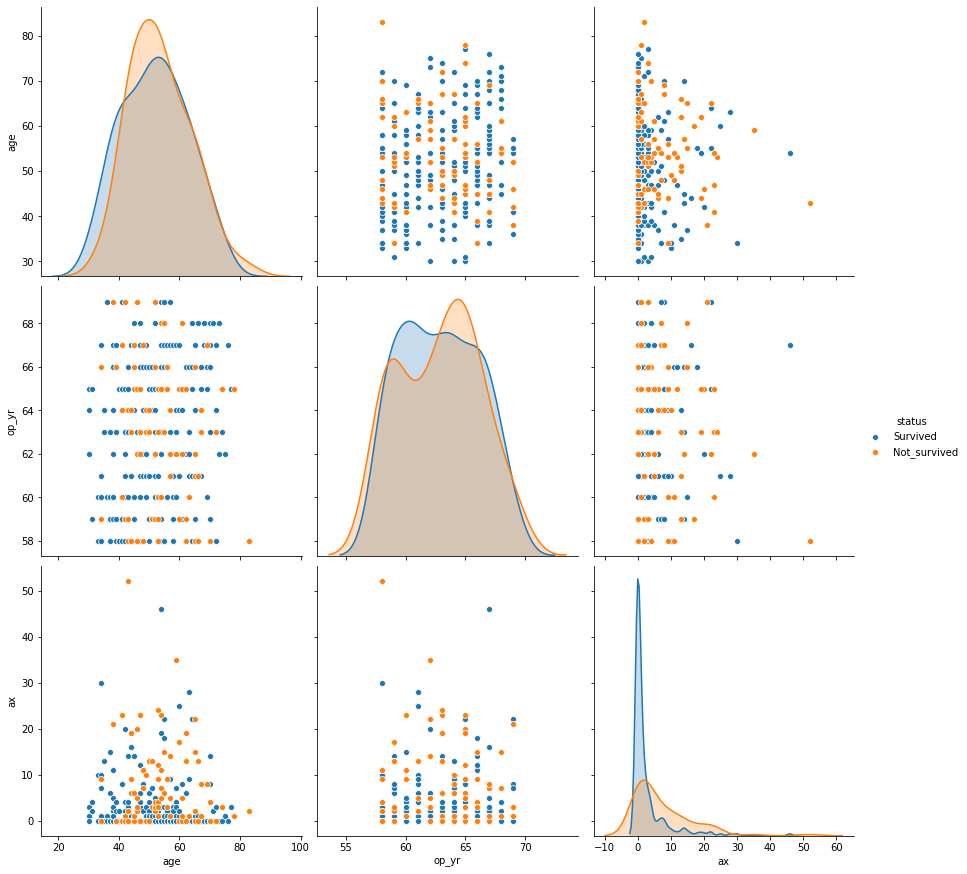

***Hint: Use FacetGrid***

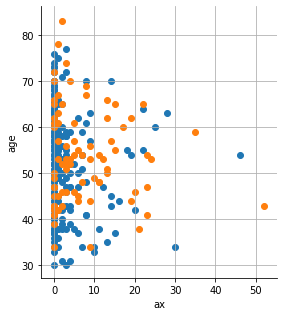

In [240]:
g = sns.FacetGrid(haberman_data, hue = 'status', height = 4.5, aspect = .9)
g.map(plt.scatter, 'ax', 'age')
plt.grid(True)

***Observation :*** Input your answer below

* The fewer the axil nodesdetected the higher the chances of survival
* 

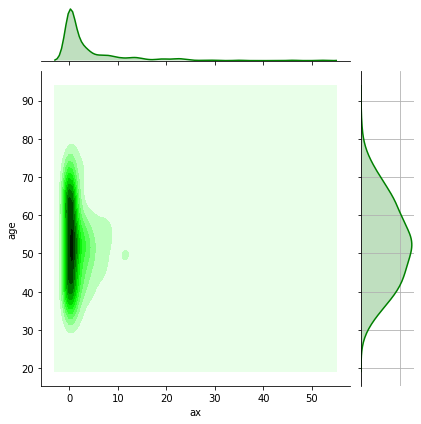

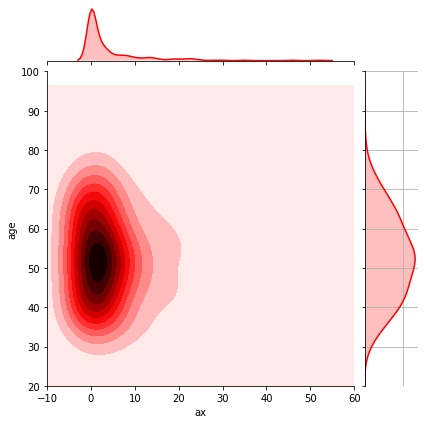

In [243]:
sns.jointplot(x = 'ax', y = 'age', data = haberman_data, kind = 'kde', color = 'green')
plt.grid(True)

sns.jointplot(x = 'ax', y = 'age', data = haberman_data, kind = 'kde', color = 'red', ylim = ([20, 100]), xlim = ([-10, 60]), joint_kws = {'bw':4.5, 'kernel':'tri'})
plt.grid(True)

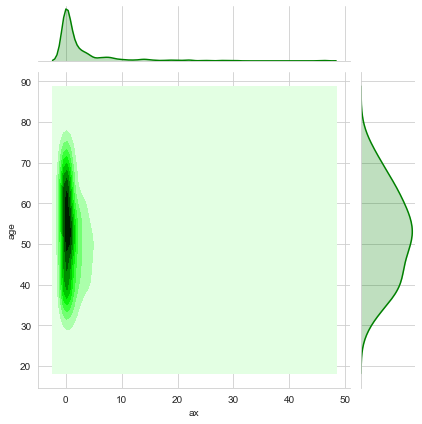

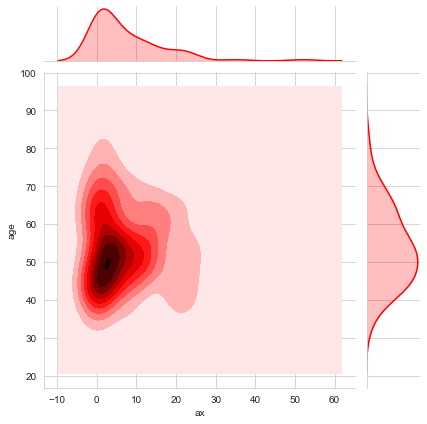

***Observation :*** Input your answer below

* 
* 
* 

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.